# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [ ]:
# Import warnings



In [ ]:
# Import the libraries you will be using for analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd


In [ ]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [ ]:
# Try loading one file

# df = pd.read_parquet('2023-1.parquet')
# df.info()

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
import pandas as pd
import os

# Select the folder having data files
os.chdir('/content/drive/MyDrive/DatasetsandDictionary/trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()

# Initialise an empty dataframe
df = pd.DataFrame()

# Iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # File path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        print(f"Processing file: {file_name}")

        # Reading the current file
        temp_df = pd.read_parquet(file_path)

        # Ensure datetime format
        temp_df["tpep_pickup_datetime"] = pd.to_datetime(temp_df["tpep_pickup_datetime"], errors="coerce")

        # Filter data for 2023
        temp_df = temp_df[temp_df["tpep_pickup_datetime"].dt.year == 2023]

        # Extract date and hour
        temp_df["date"] = temp_df["tpep_pickup_datetime"].dt.date
        temp_df["hour"] = temp_df["tpep_pickup_datetime"].dt.hour

        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        for cur_date in temp_df["date"].unique():
            # Select data for the current date
            date_wise_data = temp_df[temp_df["date"] == cur_date]

            # Iterate through each hour of the selected date
            for hour in range(24):
                hour_data = date_wise_data[date_wise_data["hour"] == hour]

                if not hour_data.empty:
                    # Sample 5% of the hourly data randomly
                    sampled_hourly_data = hour_data.sample(frac=0.007, random_state=0)
                    # Add sampled data of this hour to the dataframe
                    sampled_data = pd.concat([sampled_data, sampled_hourly_data])

        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df, sampled_data], ignore_index=True)

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

# Save the final sampled dataset
df.to_parquet("final_sampling.parquet", index=False)
files.download("final_sampling.parquet")

# Summary
print(f"\nFinal sampled dataset saved as 'final_sampling'")
print(f"Total rows: {df.shape[0]}")


Processing file: 2023-1.parquet
Processing file: 2023-2.parquet
Processing file: 2023-3.parquet
Processing file: 2023-4.parquet
Processing file: 2023-5.parquet
Processing file: 2023-6.parquet
Processing file: 2023-7.parquet
Processing file: 2023-8.parquet
Processing file: 2023-9.parquet
Processing file: 2023-10.parquet
Processing file: 2023-11.parquet
Processing file: 2023-12.parquet


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Final sampled dataset saved as 'final_sampling'
Total rows: 265487


After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [ ]:
# Load the new data file
from google.colab import files
upload = files.upload()

Saving final_sampling.parquet to final_sampling (1).parquet


In [ ]:
df = pd.read_parquet('final_sampling.parquet')

In [ ]:
# df.head()
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,date,hour,Airport_fee
0,1,2023-01-01 00:54:05,2023-01-01 00:59:36,1.0,1.20,1.0,N,263,229,1,...,0.5,2.55,0.00,1.0,15.45,2.5,0.0,2023-01-01,0,NaN
1,1,2023-01-01 00:34:23,2023-01-01 00:44:54,1.0,1.50,1.0,N,87,144,2,...,0.5,0.00,0.00,1.0,15.00,2.5,0.0,2023-01-01,0,NaN
2,2,2023-01-01 00:22:06,2023-01-01 00:40:00,2.0,3.63,1.0,N,142,107,1,...,0.5,5.10,0.00,1.0,30.60,2.5,0.0,2023-01-01,0,NaN
3,1,2023-01-01 00:46:57,2023-01-01 00:54:41,2.0,1.90,1.0,N,161,236,1,...,0.5,3.10,0.00,1.0,18.80,2.5,0.0,2023-01-01,0,NaN
4,2,2023-01-01 00:11:19,2023-01-01 00:40:03,1.0,7.87,1.0,N,164,260,2,...,0.5,0.00,6.55,1.0,50.25,2.5,0.0,2023-01-01,0,NaN


In [ ]:
# df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265487 entries, 0 to 265486
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               265487 non-null  int64         
 1   tpep_pickup_datetime   265487 non-null  datetime64[us]
 2   tpep_dropoff_datetime  265487 non-null  datetime64[us]
 3   passenger_count        256764 non-null  float64       
 4   trip_distance          265487 non-null  float64       
 5   RatecodeID             256764 non-null  float64       
 6   store_and_fwd_flag     256764 non-null  object        
 7   PULocationID           265487 non-null  int64         
 8   DOLocationID           265487 non-null  int64         
 9   payment_type           265487 non-null  int64         
 10  fare_amount            265487 non-null  float64       
 11  extra                  265487 non-null  float64       
 12  mta_tax                265487 non-null  floa

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [ ]:
# Fix the index and drop any columns that are not needed



**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [ ]:
# Combine the two airport fee columns
if 'airport_fee' in df.columns and 'Airport_fee' in df.columns:
  df['Airport_Fee'] = df['airport_fee'].combine_first(df['Airport_fee'])
  df.drop(columns= ['airport_fee', 'Airport_fee'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265487 entries, 0 to 265486
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               265487 non-null  int64         
 1   tpep_pickup_datetime   265487 non-null  datetime64[us]
 2   tpep_dropoff_datetime  265487 non-null  datetime64[us]
 3   passenger_count        256764 non-null  float64       
 4   trip_distance          265487 non-null  float64       
 5   RatecodeID             256764 non-null  float64       
 6   store_and_fwd_flag     256764 non-null  object        
 7   PULocationID           265487 non-null  int64         
 8   DOLocationID           265487 non-null  int64         
 9   payment_type           265487 non-null  int64         
 10  fare_amount            265487 non-null  float64       
 11  extra                  265487 non-null  float64       
 12  mta_tax                265487 non-null  floa

**2.1.4** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [ ]:
# check where values of fare amount are negative
negative_values = df[df['fare_amount'] < 0]
if not negative_values.empty:
  print('there are negative values in Fare_amount column')
else:
  print('there are no negative values in Fare_amount column')

there are no negative values in Fare_amount column


Did you notice something different in the `RatecodeID` column for above records?

In [ ]:
# Analyse RatecodeID for the negative fare amounts
RatecodeID = df[df[df['fare_amount'] < 0]]['RatecodeID']
print('RatecodeID for the negative fare_amout:', RatecodeID.count())

<ipython-input-12-29b7ccd780bd>:2: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  RatecodeID = df[df[df['fare_amount'] < 0]]['RatecodeID']


RatecodeID for the negative fare_amout: 0


In [ ]:
# Find which columns have negative values
negative_columns = df.select_dtypes(include=['int64', 'float64']).columns
columns=[col for col in negative_columns if (df[col] < 0).any()]
print(f"column with negative values : {columns}")

column with negative values : ['mta_tax', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'Airport_Fee']


In [ ]:
# fix these negative values
negative_columns= [col for col in df.columns if df[col].dtype in ['int64', 'float64'] and (df[col] < 0).any()]
print(f"columns having negative values: {negative_columns}")
if negative_columns:
  df[negative_columns] = df[negative_columns].abs()
  print('Negative values have been fixed with abs values')
else:
  print('No negative values found')

columns having negative values: ['mta_tax', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'Airport_Fee']
Negative values have been fixed with abs values


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [ ]:
# Find the proportion of missing values in each column
100*df.isnull().mean()

,0
VendorID,0.00000
tpep_pickup_datetime,0.00000
tpep_dropoff_datetime,0.00000
passenger_count,3.28566
trip_distance,0.00000
RatecodeID,3.28566
store_and_fwd_flag,3.28566
PULocationID,0.00000
DOLocationID,0.00000
payment_type,0.00000


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [ ]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
rows_with_null = df[df.isnull().any(axis=1)]
print('Rows with null Value',rows_with_null)

Rows with null Value         VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
54             2  2023-01-01 01:54:04   2023-01-01 02:09:33              NaN   
75             2  2023-01-01 01:08:00   2023-01-01 01:30:00              NaN   
83             2  2023-01-01 02:07:51   2023-01-01 02:32:27              NaN   
87             2  2023-01-01 02:22:53   2023-01-01 02:48:46              NaN   
108            2  2023-01-01 02:52:18   2023-01-01 03:08:10              NaN   
...          ...                  ...                   ...              ...   
265450         2  2023-12-31 22:43:52   2023-12-31 22:55:06              NaN   
265452         1  2023-12-31 22:56:28   2023-12-31 23:02:16              NaN   
265455         2  2023-12-31 22:15:20   2023-12-31 22:26:07              NaN   
265462         2  2023-12-31 23:01:23   2023-12-31 23:16:21              NaN   
265474         2  2023-12-31 23:42:42   2023-12-31 23:56:18              NaN   

        trip_dista

Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [ ]:
# Fix missing values in 'RatecodeID'
missing_values_in_columns = {
    'passenger_count': df['passenger_count'].median(),
    'RatecodeID': df['RatecodeID'].median() if df['RatecodeID'].skew() > 1 else df['RatecodeID'].mean(),
    'congestion_surcharge': df['congestion_surcharge'].median() if df['congestion_surcharge'].skew() > 1 else df['congestion_surcharge'].mean(),
    'Airport_Fee': df['Airport_Fee'].mode()[0],
    'store_and_fwd_flag': df['store_and_fwd_flag'].mode()[0]
}

df = df.fillna(missing_values_in_columns)

df['store_and_fwd_flag'] = df['store_and_fwd_flag'].astype('category')



**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [ ]:
# handle null values in congestion_surcharge
df['congestion_surcharge'].isnull().sum()



0

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [ ]:
# Handle any remaining missing values
100*df.isnull().mean()


,0
VendorID,0.0
tpep_pickup_datetime,0.0
tpep_dropoff_datetime,0.0
passenger_count,0.0
trip_distance,0.0
RatecodeID,0.0
store_and_fwd_flag,0.0
PULocationID,0.0
DOLocationID,0.0
payment_type,0.0


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [ ]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

def detect_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return outliers

outliers_dict = {}
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        outliers = detect_outliers_iqr(df[col])
        if not outliers.empty:
            outliers_dict[col] = outliers

if outliers_dict:
    print("Columns with outliers:")
    for col, outliers in outliers_dict.items():
        print(f"{col}: {len(outliers)} outliers")
else:
    print("No outliers.")

Columns with outliers:
VendorID: 62 outliers
passenger_count: 63943 outliers
trip_distance: 35146 outliers
RatecodeID: 14644 outliers
payment_type: 56271 outliers
fare_amount: 26478 outliers
extra: 4765 outliers
mta_tax: 2523 outliers
tip_amount: 20659 outliers
tolls_amount: 21914 outliers
improvement_surcharge: 312 outliers
total_amount: 30828 outliers
congestion_surcharge: 28465 outliers
Airport_Fee: 22934 outliers


In [ ]:
def impute_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median_value = column.median()

    return column.apply(lambda x: median_value if x < lower_bound or x > upper_bound else x)

df_clean = df.copy()
df_clean[df_clean.select_dtypes(include=['number']).columns] = df_clean.select_dtypes(include=['number']).apply(impute_outliers_iqr)


**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [ ]:
# remove passenger_count > 6
df = df[df['passenger_count'] < 6]

In [ ]:
# Continue with outlier handling
df = df[~((df['trip_distance'] < 0.1) & (df['fare_amount'] > 300))]
df = df[~((df['trip_distance'] == 0) & (df['fare_amount'] == 0) & (df['tpep_pickup_datetime'] != df['tpep_dropoff_datetime']))]
df = df[df['trip_distance'] <= 250]
df = df[df['payment_type'] != 0]


In [ ]:
df['trip_distance'].fillna(df['trip_distance'].median(), inplace=True)
df['fare_amount'].fillna(df['fare_amount'].median(), inplace=True)



<ipython-input-25-0d81736a997c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['trip_distance'].fillna(df['trip_distance'].median(), inplace=True)
<ipython-input-25-0d81736a997c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [ ]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'date',
 'hour',
 'Airport_Fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

In [ ]:
numerical_columns = df.select_dtypes(include=['int64','float64']).columns.tolist()
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

In [ ]:
# Find and show the hourly trends in taxi pickups
hourly_trips = df.groupby('hour').size().reset_index(name='trip_count')
print(hourly_trips)

    hour  trip_count
0      0        7091
1      1        4778
2      2        3126
3      3        2042
4      4        1343
5      5        1450
6      6        3405
7      7        6718
8      8        9420
9      9       10848
10    10       11851
11    11       12896
12    12       14045
13    13       14434
14    14       15482
15    15       15875
16    16       15875
17    17       17197
18    18       17970
19    19       16129
20    20       14436
21    21       14376
22    22       13206
23    23       10414


<ipython-input-29-7dc07b21ad2b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['hour'], palette='coolwarm')


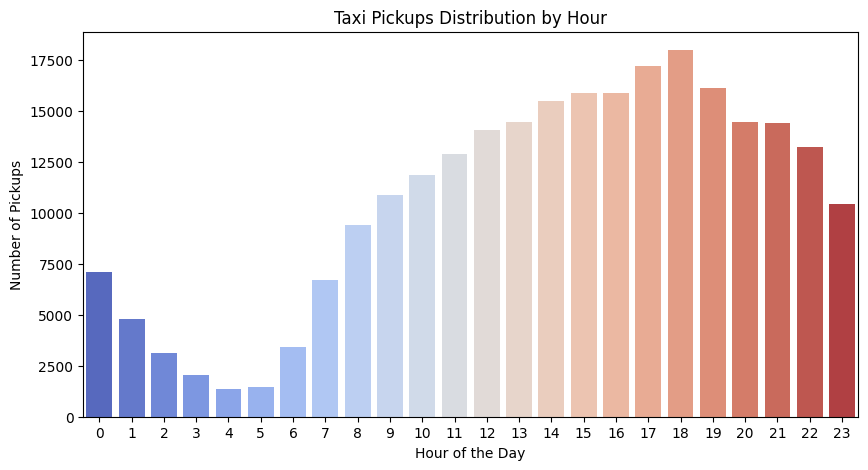

In [ ]:
# Visualization of trends in Taxi Pickps
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.countplot(x=df['hour'], palette='coolwarm')
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Pickups")
plt.title("Taxi Pickups Distribution by Hour")
plt.xticks(range(0, 24))
plt.show()


In [ ]:
# Find and show the daily trends in taxi pickups (days of the week)
df['pickup_dayofweek'] = df['tpep_pickup_datetime'].dt.strftime('%A')
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
daily_pickups = df['pickup_dayofweek'].value_counts().reindex(day_order)

print(daily_pickups)

pickup_dayofweek
Monday       31845
Tuesday      36886
Wednesday    39108
Thursday     39863
Friday       37842
Saturday     36898
Sunday       31965
Name: count, dtype: int64


<ipython-input-31-c5bbfb0a7f71>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=daily_pickups.index, y=daily_pickups.values, palette="coolwarm")


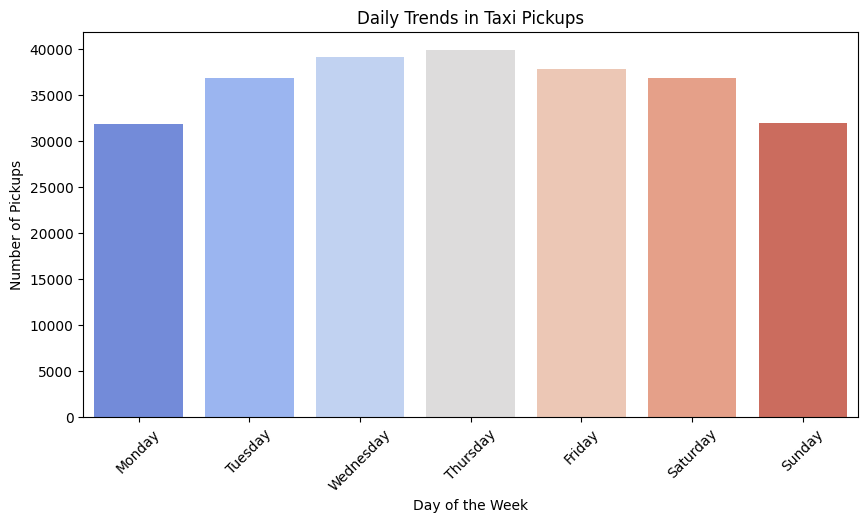

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.barplot(x=daily_pickups.index, y=daily_pickups.values, palette="coolwarm")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Pickups")
plt.title("Daily Trends in Taxi Pickups")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Show the monthly trends in pickups
df['pickup_month'] = df['tpep_pickup_datetime'].dt.strftime('%B')
month_order = ['January','February','March','April','May','June','July','August','September','Octomber','November','December']
monthly_pickups = df['pickup_month'].value_counts().reindex(month_order)
print(monthly_pickups)

pickup_month
January      20611.0
February     19514.0
March        22780.0
April        21974.0
May          23450.0
June         22086.0
July         19385.0
August       18818.0
September    18602.0
Octomber         NaN
November     22028.0
December     21967.0
Name: count, dtype: float64


<ipython-input-33-e6183082a054>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_pickups.index, y=monthly_pickups.values, palette='coolwarm')


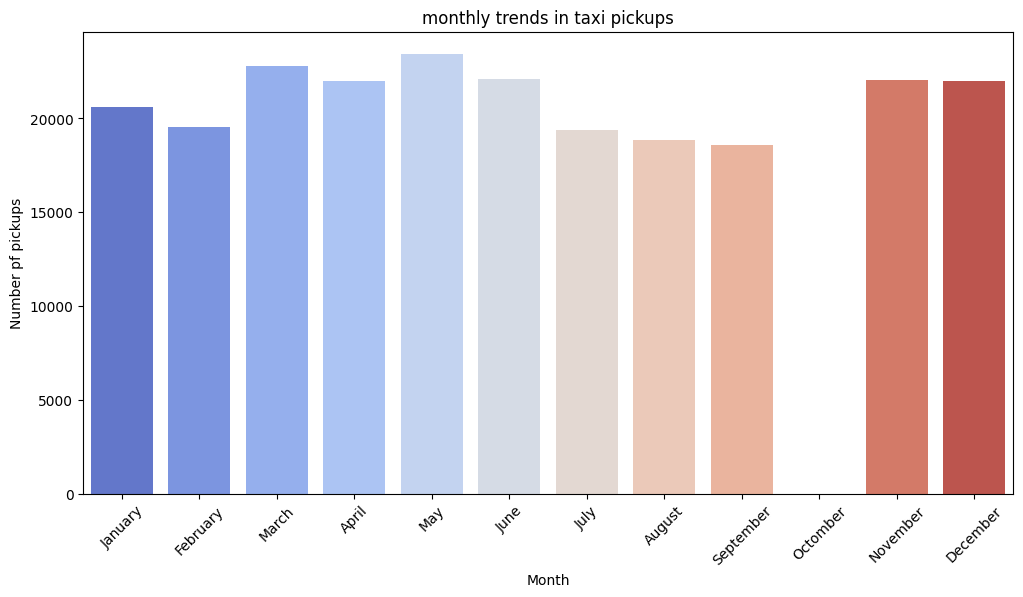

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(x=monthly_pickups.index, y=monthly_pickups.values, palette='coolwarm')
plt.xlabel('Month')
plt.ylabel('Number pf pickups')
plt.title('monthly trends in taxi pickups')
plt.xticks(rotation =45)
plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [ ]:
# Analyse the above parameters
check_column = ['fare_amount','tip_amount','total_amount']
negative_val = df[check_column] < 0
print(negative_val.sum())

fare_amount     0
tip_amount      0
total_amount    0
dtype: int64


In [ ]:
zero_val = df[check_column]==0
print(zero_val.sum())

fare_amount        54
tip_amount      56930
total_amount       16
dtype: int64


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [ ]:
# Create a df with non zero entries for the selected parameters.
df_non_zero = df[(df[check_column] !=0).all(axis=1)]
print(f"original rows:{df.shape[0]}")
print(f'after removing zero values: {df_non_zero.shape[0]}')


original rows:254407
after removing zero values: 197477


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

In [ ]:
# Group data by month and analyse monthly revenue
import pandas as pd
import calendar

df['pickup_month'] = df['tpep_pickup_datetime'].dt.month

monthly_revenue = df.groupby('pickup_month')['total_amount'].sum().reset_index()

monthly_revenue['pickup_month'] = monthly_revenue['pickup_month'].apply(lambda x: calendar.month_name[x])

month_order = list(calendar.month_name[1:])
monthly_revenue = monthly_revenue.set_index('pickup_month').reindex(month_order).reset_index()
print(monthly_revenue)


   pickup_month  total_amount
0       January     572074.80
1      February     532630.07
2         March     644895.61
3         April     634978.77
4           May     692851.35
5          June     647090.00
6          July     564316.53
7        August     559334.08
8     September     558561.65
9       October     689335.57
10     November     651674.61
11     December     642767.56


**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [ ]:
# Calculate proportion of each quarter
import pandas as pd

df['quarter'] = df['tpep_pickup_datetime'].dt.quarter
quarterly_revenue = df.groupby('quarter')['total_amount'].sum().reset_index()

quarterly_revenue['proportion'] = (quarterly_revenue['total_amount'] / quarterly_revenue['total_amount'].sum()) * 100
print(quarterly_revenue)



   quarter  total_amount  proportion
0        1    1749600.48   23.673608
1        2    1974920.12   26.722377
2        3    1682212.26   22.761787
3        4    1983777.74   26.842228


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

Correlation between trip_distance and fare_amount: 0.94


(0.0, 20.3)

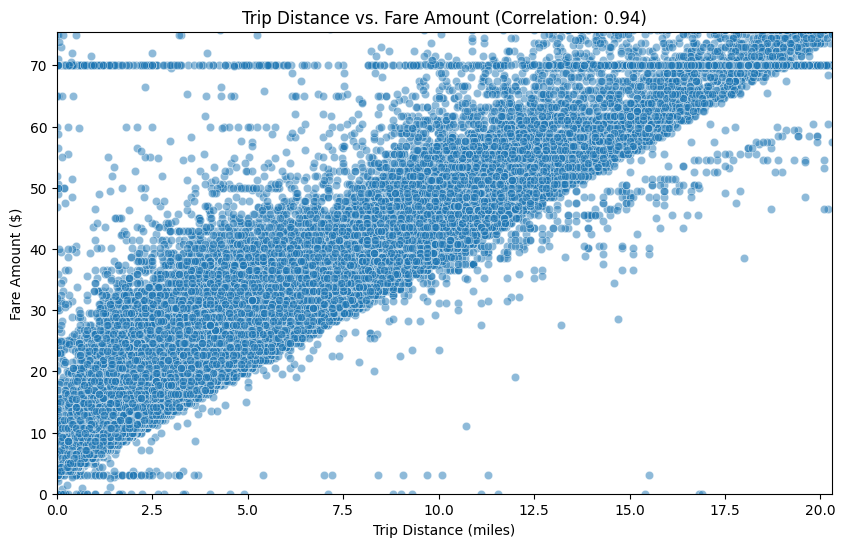

In [ ]:
# Show how trip fare is affected by distance
import seaborn as sns
import matplotlib.pyplot as plt

df_filtered = df[df['trip_distance'] > 0]

correlation = df_filtered[['trip_distance', 'fare_amount']].corr().iloc[0, 1]
print(f"Correlation between trip_distance and fare_amount: {correlation:.2f}")

plt.figure(figsize=(10,6))
sns.scatterplot(x=df_filtered['trip_distance'], y=df_filtered['fare_amount'], alpha=0.5)
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.title(f'Trip Distance vs. Fare Amount (Correlation: {correlation:.2f})')
plt.ylim(0, df_filtered['fare_amount'].quantile(0.99))
plt.xlim(0, df_filtered['trip_distance'].quantile(0.99))



**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

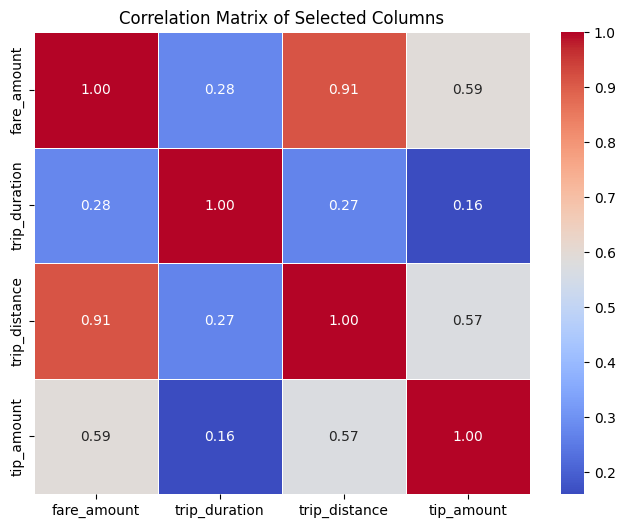

In [ ]:
# Show relationship between fare and trip duration

df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60
correlation_matrix = df[['fare_amount','trip_duration','trip_distance','tip_amount']].corr()


import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Selected Columns')
plt.show()


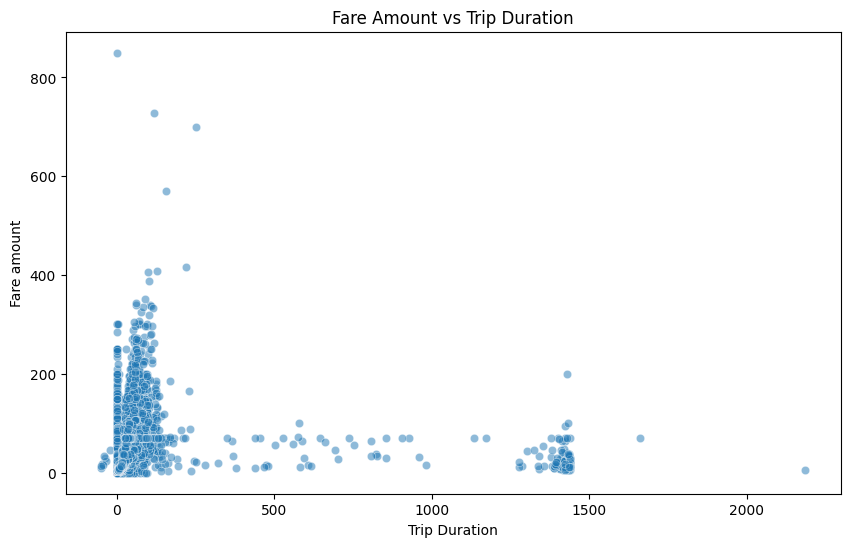

In [ ]:
# Show relationship between fare and number of passengers
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['trip_duration'], y=df['fare_amount'], alpha=0.5)
plt.xlabel('Trip Duration')
plt.ylabel('Fare amount')
plt.title('Fare Amount vs Trip Duration')
plt.show()

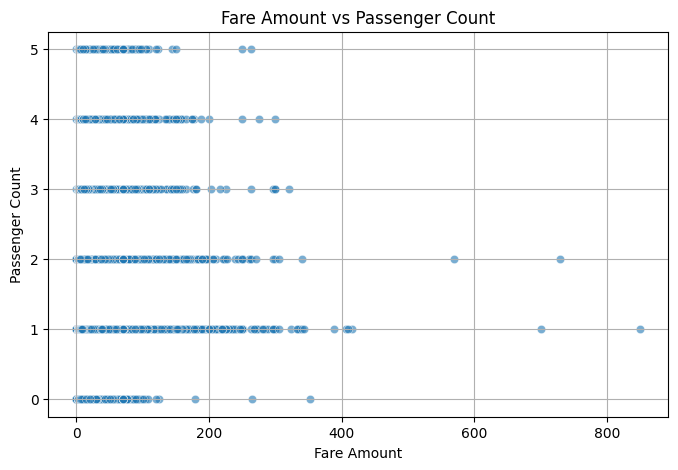

In [ ]:
# Show relationship between fare amount and passenger count
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['fare_amount'], y=df['passenger_count'], alpha=0.6)
plt.xlabel('Fare Amount')
plt.ylabel('Passenger Count')
plt.title( 'Fare Amount vs Passenger Count')
plt.grid(True)
plt.show()

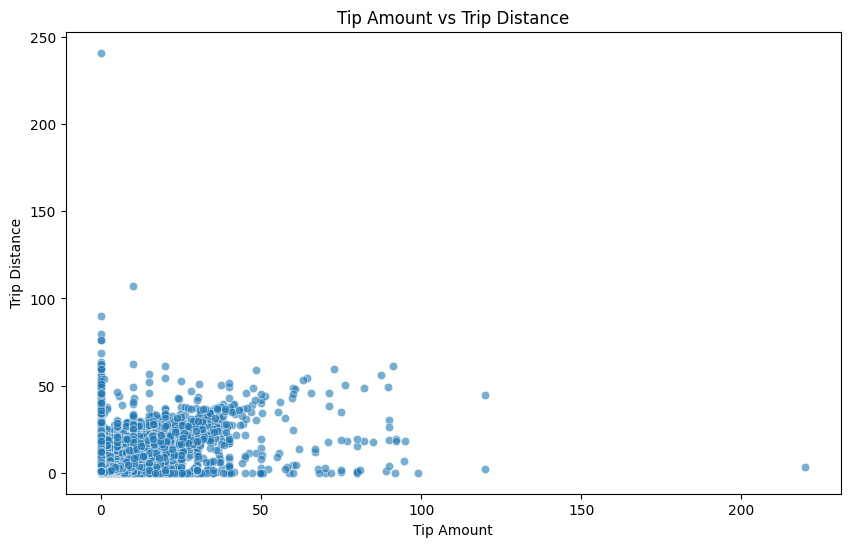

In [ ]:
# Show relationship between tip amount and trip distance
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['tip_amount'], y=df['trip_distance'], alpha=0.6)
plt.xlabel('Tip Amount')
plt.ylabel('Trip Distance')
plt.title('Tip Amount vs Trip Distance')
plt.show()

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

In [ ]:
# Analyse the distribution of different payment types (payment_type).
payment_mapping = {1: 'Credit Card', 2: 'Cash', 3: 'No Charge', 4: 'Dispute'}
df['payment_type'] = df['payment_type'].map(payment_mapping)


In [ ]:
payments_counts = df['payment_type'].value_counts()
print(payments_counts)

payment_type
Credit Card    207330
Cash            43978
Dispute          1867
No Charge        1232
Name: count, dtype: int64


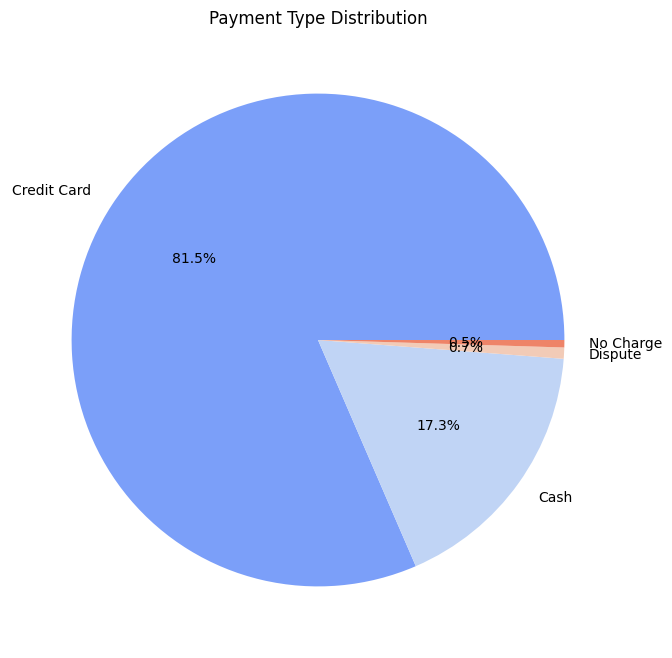

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(payments_counts, labels=payments_counts.index, autopct='%1.1f%%', colors=sns.color_palette('coolwarm', len(payments_counts)))
plt.title('Payment Type Distribution')
plt.show()

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [ ]:
# !pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [ ]:
# import geopandas as gpd
from google.colab import drive
drive.mount('/content/drive')

import geopandas as gpd

# Read the shapefile using geopandas
zones = gpd.read_file('/content/drive/MyDrive/DatasetsandDictionary/taxi_zones/taxi_zones.shp')
zones.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144..."


Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

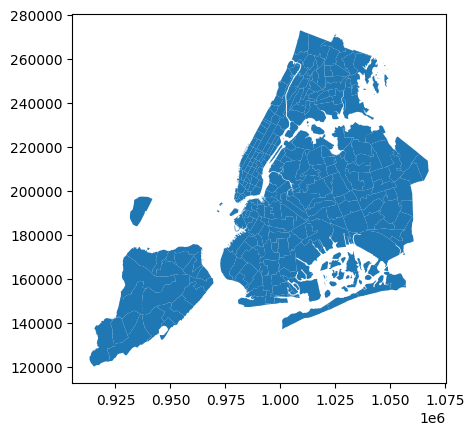

In [ ]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [ ]:
# Merge zones and trip records using locationID and PULocationID
df_trip_records = pd.read_parquet('final_sampling.parquet')
df_zones = gpd.read_file('/content/drive/MyDrive/DatasetsandDictionary/taxi_zones/taxi_zones.shp')

df_merged = df_trip_records.merge(df_zones, left_on='PULocationID', right_on='LocationID')
print(df_merged.head())

   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2023-01-01 00:54:05   2023-01-01 00:59:36              1.0   
1         1  2023-01-01 00:34:23   2023-01-01 00:44:54              1.0   
2         2  2023-01-01 00:22:06   2023-01-01 00:40:00              2.0   
3         1  2023-01-01 00:46:57   2023-01-01 00:54:41              2.0   
4         2  2023-01-01 00:11:19   2023-01-01 00:40:03              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           1.20         1.0                  N           263           229   
1           1.50         1.0                  N            87           144   
2           3.63         1.0                  N           142           107   
3           1.90         1.0                  N           161           236   
4           7.87         1.0                  N           164           260   

   payment_type  ...        date  hour  Airport_fee  OBJECTID  Shape_Leng 

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [ ]:
# Group data by location and calculate the number of trips
trip_counts = df_trip_records.groupby('PULocationID').size().reset_index(name='total_trips')
trip_counts.sort_values(by='total_trips', ascending=False).head()


,PULocationID,total_trips
118,132,13841
213,237,12483
145,161,12147
212,236,10905
146,162,9535


In [ ]:
drop_trip_counts = df_trip_records.groupby('DOLocationID').size().reset_index(name='total_trips')
drop_trip_counts.sort_values(by='total_trips', ascending=False).head()

,DOLocationID,total_trips
226,236,11527
227,237,11235
153,161,10333
220,230,8154
162,170,7807


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [ ]:
# Merge trip counts back to the zones GeoDataFrame
trip_counts.rename(columns={'PULocationID': 'LocationID', 'total_trips': 'pickup_trips'}, inplace=True)
drop_trip_counts.rename(columns={'DOLocationID': 'LocationID', 'total_trips': 'dropoff_trips'}, inplace=True)


df_zones = df_zones.merge(trip_counts, on='LocationID', how='left')
df_zones = df_zones.merge(drop_trip_counts, on='LocationID', how='left')
df_zones.fillna(0)
df_zones.head()


,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,pickup_trips,dropoff_trips
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",29.0,787.0
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343...",NaN,NaN
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2...",7.0,15.0
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20...",327.0,1055.0
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144...",1.0,1.0


The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

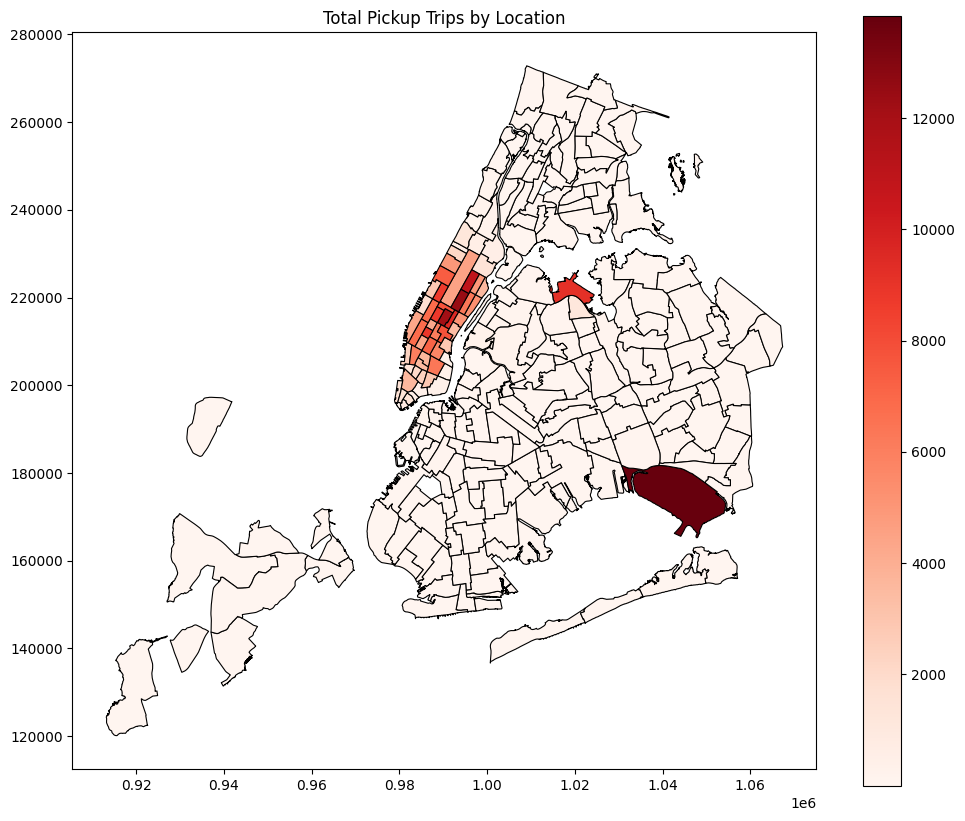

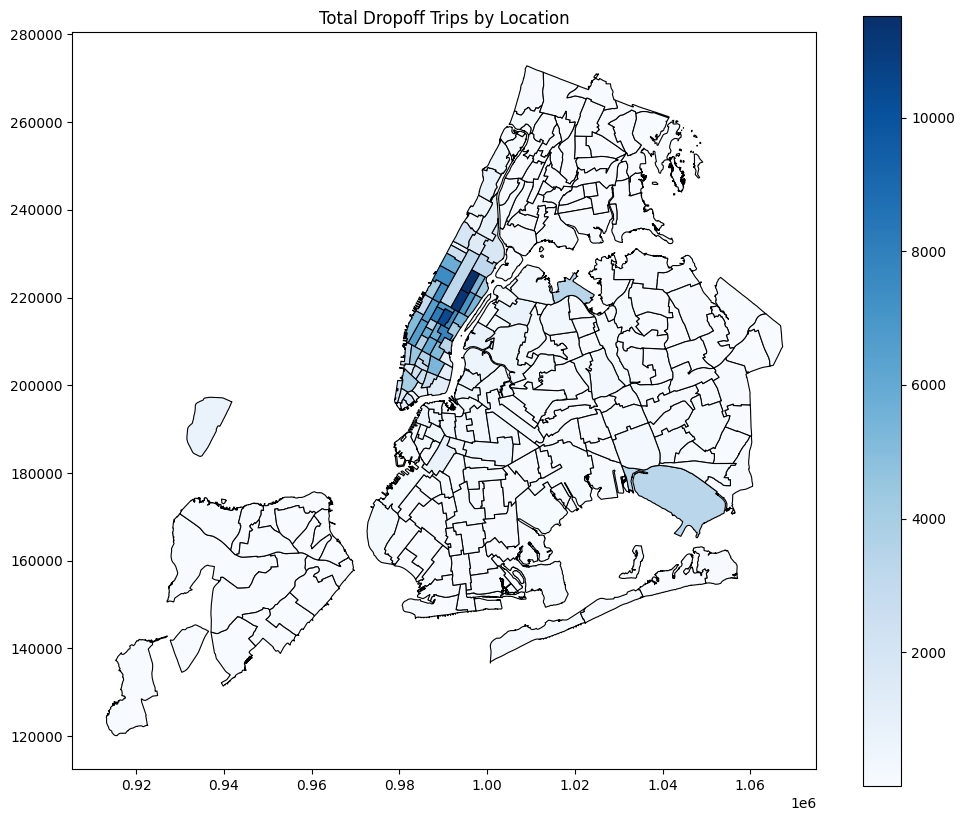

In [ ]:
# Define figure and axis
import geopandas as gpd
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1, figsize=(12, 10))
df_zones.plot(column='pickup_trips', cmap='Reds', linewidth=0.8, edgecolor='black',legend=True, ax=ax)
plt.title("Total Pickup Trips by Location")
plt.show()

fig, ax = plt.subplots(1,1, figsize=(12, 10))
df_zones.plot(column='dropoff_trips', cmap='Blues', linewidth=0.8, edgecolor='black',legend=True, ax=ax)
plt.title("Total Dropoff Trips by Location")
plt.show()


Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [ ]:
# Find routes which have the slowest speeds at different times of the day
slow_routes =df.groupby(['PULocationID','DOLocationID','hour'])['trip_duration'].mean().reset_index()
slow_routes = slow_routes.sort_values(by='trip_duration', ascending= False)
print(slow_routes.head())

       PULocationID  DOLocationID  hour  trip_duration
59108           263            24     1    1438.416667
36458           163            66    18    1436.366667
3739             48            45    14    1436.150000
34966           162            24    19    1435.350000
37039           163           166    20    1435.133333


In [ ]:
df['trip_duration_hours'] = df['trip_duration'] / 3600
df['speed_mph'] = df['trip_distance'] / df['trip_duration_hours']

In [ ]:
def time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['time_of_day'] = df['tpep_pickup_datetime'].dt.hour.apply(time_of_day)

In [ ]:
df['route'] = df['PULocationID'].astype(str) + '-' + df['DOLocationID'].astype(str)
slowest_routes = df.groupby(['route', 'time_of_day'])['speed_mph'].mean().reset_index()
slowest_routes = slowest_routes.sort_values(by='speed_mph', ascending=True)
print(slowest_routes.head(10))


         route time_of_day   speed_mph
10371   209-89       Night -688.631922
0          1-1   Afternoon    0.000000
9946   189-107   Afternoon    0.000000
9954   189-192     Morning    0.000000
9966     19-19   Afternoon    0.000000
9974   190-190     Morning    0.000000
9979   191-191       Night    0.000000
9983   191-218     Evening    0.000000
9984   191-251   Afternoon    0.000000
10013  193-193     Evening    0.000000


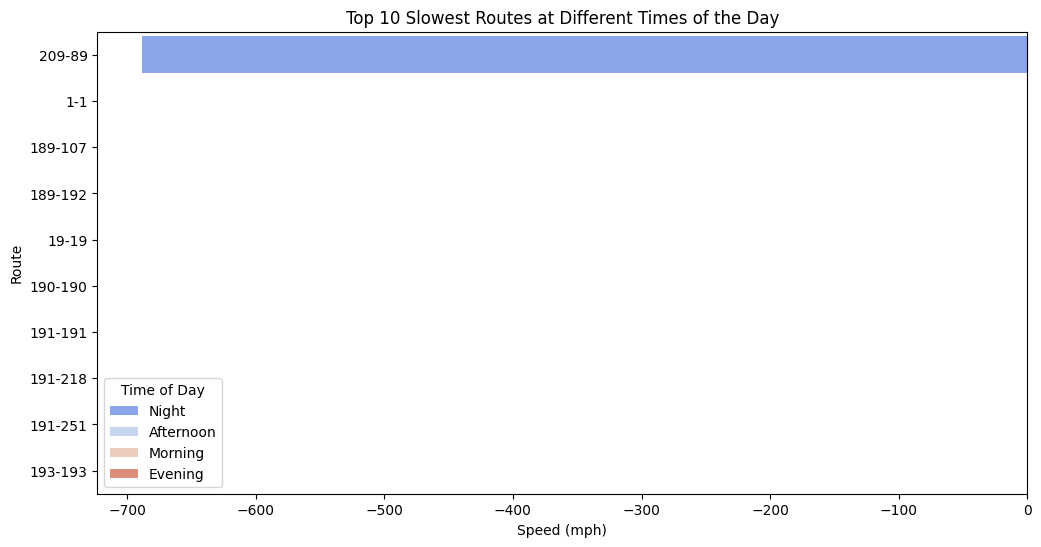

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(x='speed_mph', y='route', hue='time_of_day', data=slowest_routes.head(10), palette='coolwarm')
plt.xlabel("Speed (mph)")
plt.ylabel("Route")
plt.title("Top 10 Slowest Routes at Different Times of the Day")
plt.legend(title="Time of Day")
plt.show()

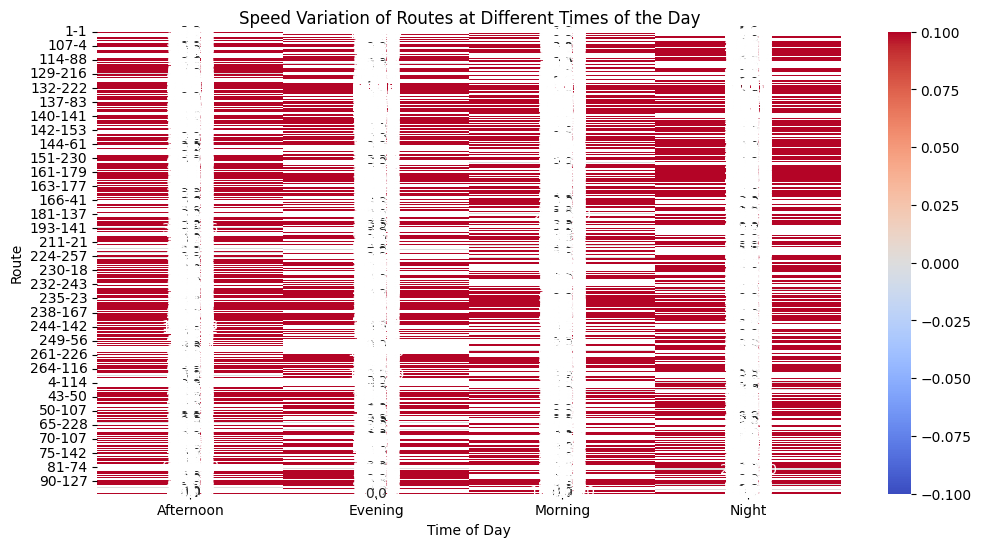

In [ ]:
pivot_table = slowest_routes.pivot(index='route', columns='time_of_day', values='speed_mph')

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap="coolwarm", annot=True, fmt=".1f")
plt.title("Speed Variation of Routes at Different Times of the Day")
plt.xlabel("Time of Day")
plt.ylabel("Route")
plt.show()

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

In [ ]:
# Visualise the number of trips per hour and find the busiest hour
df['hour'] = df['tpep_pickup_datetime'].dt.hour
df['day'] = df['tpep_pickup_datetime'].dt.strftime('%A')
df['month'] = df['tpep_pickup_datetime'].dt.strftime('%B')


<ipython-input-62-b489cea68215>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hourly_trips.index, y=hourly_trips.values, palette='coolwarm')


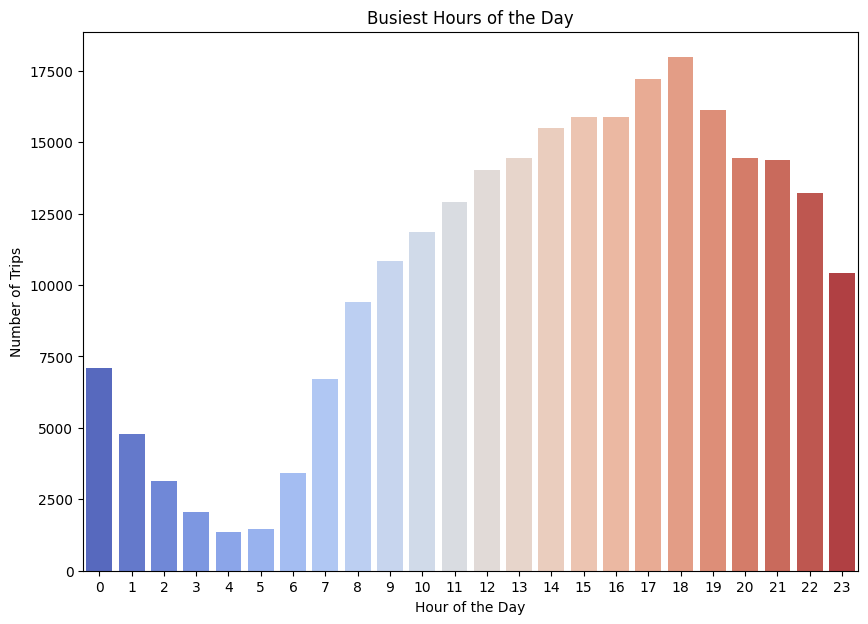

<ipython-input-62-b489cea68215>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=daily_trips.index, y=daily_trips.values, palette='coolwarm')


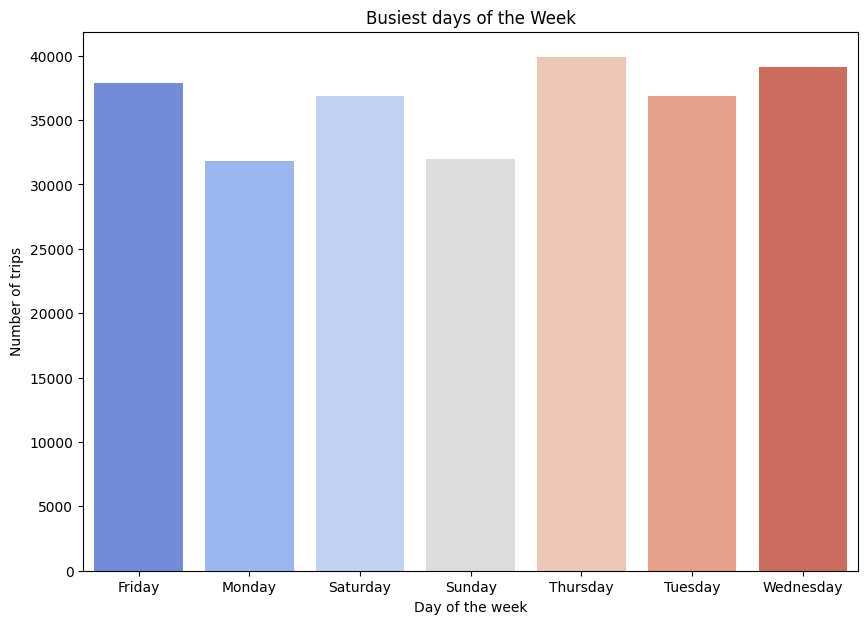

<ipython-input-62-b489cea68215>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_trips.index, y=monthly_trips.values, palette='coolwarm')


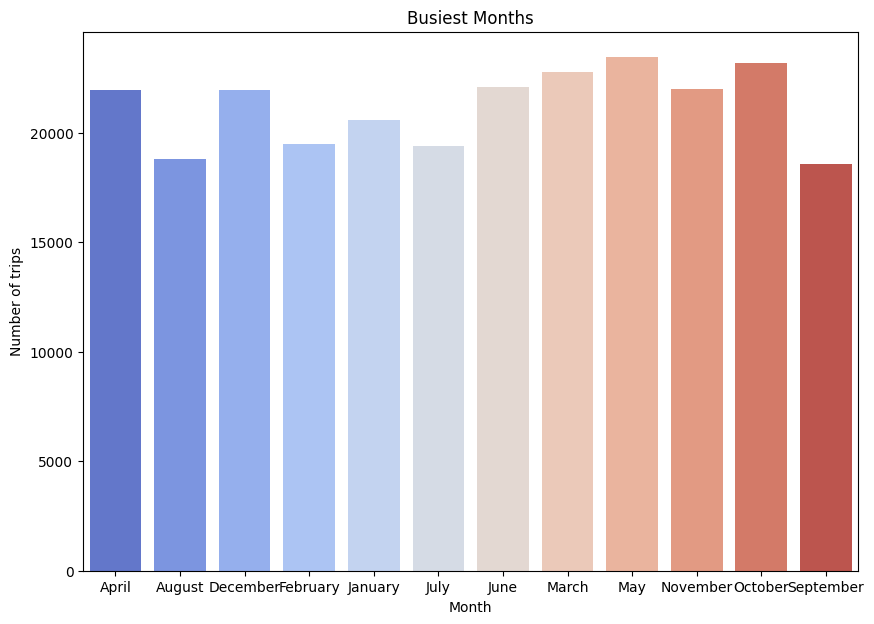

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
hourly_trips = df.groupby('hour').size()
plt.figure(figsize=(10,7))
sns.barplot(x=hourly_trips.index, y=hourly_trips.values, palette='coolwarm')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.title('Busiest Hours of the Day')
plt.show()

daily_trips = df.groupby('day').size()
plt.figure(figsize=(10,7))
sns.barplot(x=daily_trips.index, y=daily_trips.values, palette='coolwarm')
plt.xlabel('Day of the week')
plt.ylabel('Number of trips')
plt.title('Busiest days of the Week')
plt.show()

monthly_trips = df.groupby('month').size()
plt.figure(figsize=(10,7))
sns.barplot(x=monthly_trips.index, y=monthly_trips.values, palette='coolwarm')
plt.xlabel('Month')
plt.ylabel('Number of trips')
plt.title('Busiest Months')
plt.show()

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [ ]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.007
hourly_trips = df.groupby('hour').size().reset_index(name='trip_count')
hourly_trips['actual_trips'] = hourly_trips['trip_count'] / 0.007


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

In [ ]:
# Compare traffic trends for the week days and weekends
df['pickup_dayofweek'] = df['tpep_pickup_datetime'].dt.dayofweek
df['day_type'] = df['pickup_dayofweek'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

hourly_traffic = df.groupby(['hour','day_type']).size().reset_index(name='trip_count')
print(hourly_traffic.head())

   hour day_type  trip_count
0     0  Weekday        3541
1     0  Weekend        3550
2     1  Weekday        1841
3     1  Weekend        2937
4     2  Weekday         994


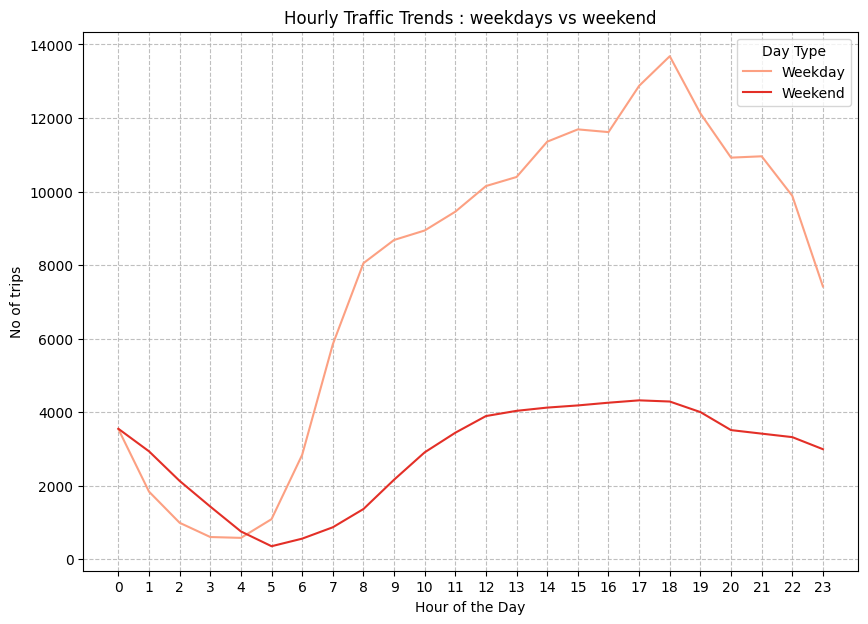

In [ ]:
plt.figure(figsize=(10,7))
sns.lineplot(x='hour', y='trip_count', hue='day_type', data=hourly_traffic, palette='Reds')
plt.xlabel('Hour of the Day')
plt.ylabel('No of trips')
plt.title('Hourly Traffic Trends : weekdays vs weekend')
plt.legend(title='Day Type')
plt.grid(True, linestyle='--', alpha=0.8)
plt.xticks(range(0,24))
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [ ]:
# Find top 10 pickup and dropoff zones
pickupzones= df.groupby('PULocationID').size().reset_index(name='pickup_count')
top10_pickups_zone = pickupzones.sort_values(by='pickup_count', ascending=False).head(10)['PULocationID']

dropoffzones= df.groupby('DOLocationID').size().reset_index(name='dropoff_count')
top10_dropoff_zone = dropoffzones.sort_values(by='dropoff_count', ascending=False).head(10)['DOLocationID']

pickups_hourly_trends = df[df['PULocationID'].isin(top10_pickups_zone)].groupby(['PULocationID', 'hour']).size().reset_index(name='trip_count')
dropoff_hourly_trends = df[df['DOLocationID'].isin(top10_dropoff_zone)].groupby(['DOLocationID', 'hour']).size().reset_index(name='trip_count')

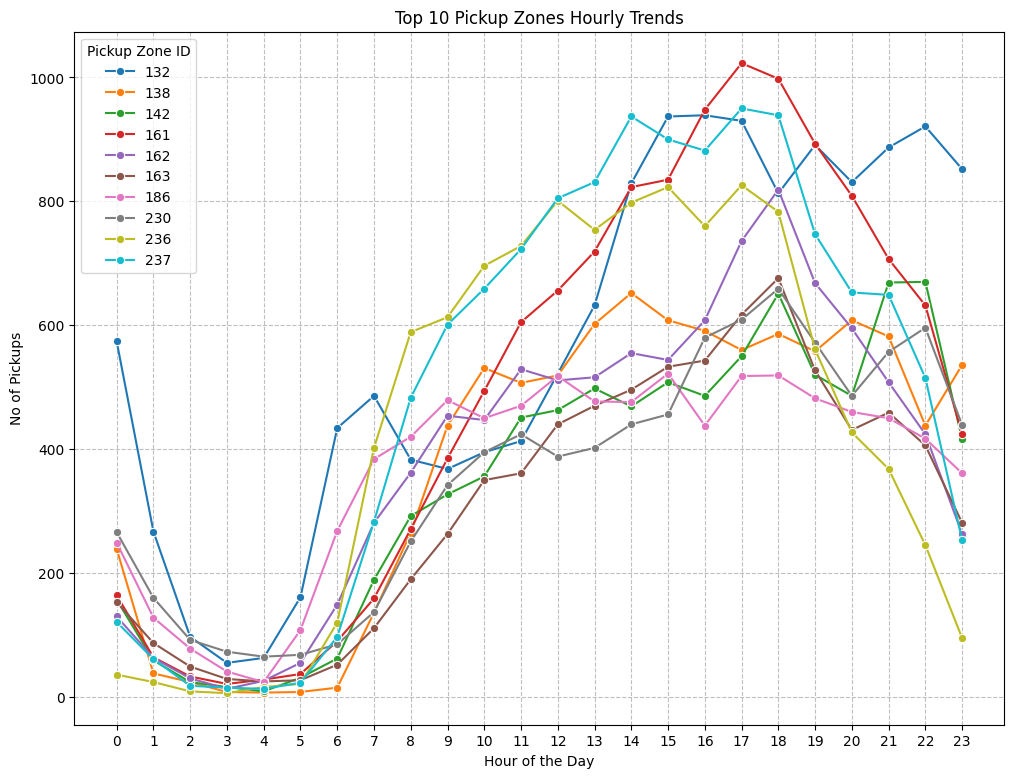

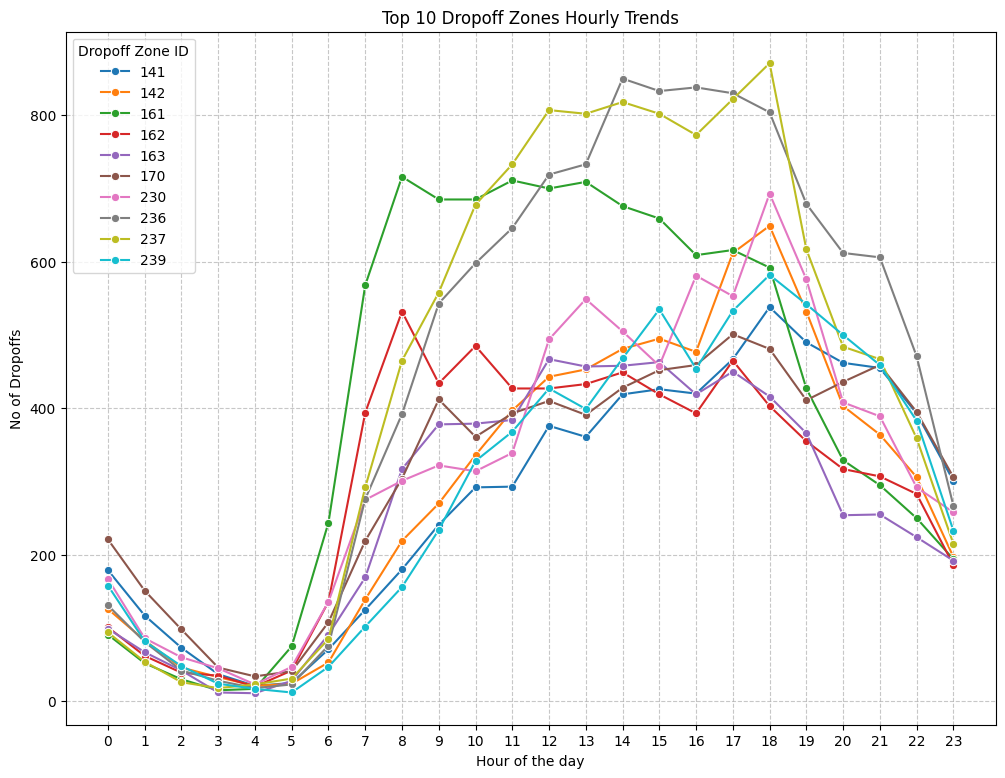

In [ ]:
plt.figure(figsize=(12,9))
sns.lineplot(x='hour', y='trip_count', hue='PULocationID', data=pickups_hourly_trends, marker='o',palette='tab10')
plt.xlabel('Hour of the Day')
plt.ylabel('No of Pickups')
plt.title('Top 10 Pickup Zones Hourly Trends')
plt.xticks(range(0,24))
plt.legend(title='Pickup Zone ID')
plt.grid(True, linestyle='--', alpha=0.8)
plt.show()


plt.figure(figsize=(12,9))
sns.lineplot(x='hour', y='trip_count', hue='DOLocationID', data=dropoff_hourly_trends, marker='o', palette='tab10')
plt.xlabel('Hour of the day')
plt.ylabel('No of Dropoffs')
plt.title('Top 10 Dropoff Zones Hourly Trends')
plt.xticks(range(0,24))
plt.legend(title='Dropoff Zone ID')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [ ]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
pickupcounts = df.groupby('PULocationID').size().reset_index(name='pickup_count')
dropcounts = df.groupby('DOLocationID').size().reset_index(name='dropoff_count')

pickupcounts.rename(columns={'PULocationID' : 'LocationID'},inplace= True)
dropcounts.rename(columns={'DOLocationID' : 'LocationID'}, inplace=True)
zones_counts = pd.merge(pickupcounts, dropcounts, on='LocationID', how='outer').fillna(0)

zones_counts['pickup_dropoff_ratio'] = zones_counts['pickup_count'] / zones_counts['dropoff_count']


In [ ]:
highest_ratio = zones_counts.sort_values(by='pickup_dropoff_ratio', ascending=False).head(10)
lowest_ratio = zones_counts.sort_values(by='pickup_dropoff_ratio', ascending=True).head(10)
print('Top 10 Highest Pickup/Dropoff Ratios')
print(highest_ratio)
print('Top 10 Lowest Pickup/Dropoff Ratios')
print(lowest_ratio)

Top 10 Highest Pickup/Dropoff Ratios
     LocationID  pickup_count  dropoff_count  pickup_dropoff_ratio
68           70        1144.0            140              8.171429
124         132       13680.0           3085              4.434360
130         138        9056.0           3132              2.891443
178         186        8737.0           5588              1.563529
41           43        4381.0           3064              1.429830
106         114        3339.0           2467              1.353466
239         249        5791.0           4317              1.341441
154         162        9286.0           7144              1.299832
96          100        4207.0           3497              1.203031
87           90        4189.0           3496              1.198227
Top 10 Lowest Pickup/Dropoff Ratios
     LocationID  pickup_count  dropoff_count  pickup_dropoff_ratio
164         172           0.0              3                   0.0
176         184           0.0              3            

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [ ]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones
night_pickups = df[(df['tpep_pickup_datetime'].dt.hour >= 23) | (df['tpep_pickup_datetime'].dt.hour < 5)]
night_dropoffs = df[(df['tpep_dropoff_datetime'].dt.hour >= 23) | (df['tpep_dropoff_datetime'].dt.hour < 5)]


In [ ]:
top10_night_zone_pickups = night_pickups.groupby('PULocationID').size().reset_index(name='trip_count').sort_values(by='trip_count', ascending=False).head(10)
print('Top 10 Pickup Zones during Night Hours (11pm to 5am):')
print(top10_night_zone_pickups)

Top 10 Pickup Zones during Night Hours (11pm to 5am):
     PULocationID  trip_count
49             79        2139
82            132        1908
161           249        1751
97            148        1369
26             48        1364
70            114        1227
146           230        1095
118           186         881
88            138         852
39             68         837


In [ ]:
top10_night_zone_dropoff = night_dropoffs.groupby('DOLocationID').size().reset_index(name='trip_count').sort_values(by='trip_count', ascending=False).head(10)
print('Top 10 Pickup Zones during Night Hours (11pm to 5am):')
print(top10_night_zone_dropoff)

Top 10 Pickup Zones during Night Hours (11pm to 5am):
     DOLocationID  trip_count
68             79        1215
39             48        1058
151           170         933
91            107         812
122           141         802
57             68         794
239           263         793
225           249         721
207           230         719
129           148         678


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [ ]:
# Filter for night hours (11 PM to 5 AM)
df['time_period'] =df['hour'].apply(lambda x: 'Night' if (x >= 23 or x < 5) else 'Day')


In [ ]:
# revenue share for night-time and day-time hours
revenue_share = df.groupby('time_period')['total_amount'].sum().reset_index()
revenue_share['percentage'] = (revenue_share['total_amount'] / revenue_share['total_amount'].sum()) * 100
print(revenue_share)

  time_period  total_amount  percentage
0         Day    6548823.57   88.611247
1       Night     841687.03   11.388753


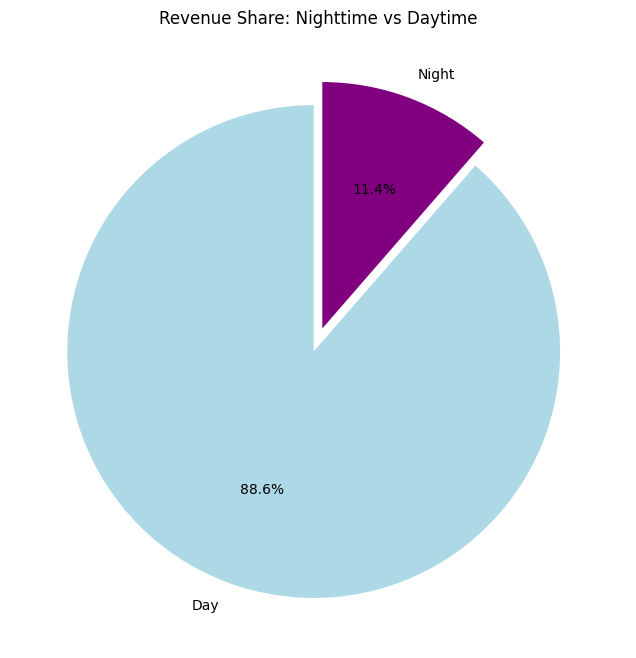

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.pie(revenue_share['total_amount'], labels=revenue_share['time_period'], autopct='%1.1f%%',colors=['lightblue', 'purple'], startangle=90, explode=[0.05,0.05])
plt.title('Revenue Share: Nighttime vs Daytime')
plt.show()

##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [ ]:
# Analyse the fare per mile per passenger for different passenger counts
filtered_df = df[(df['passenger_count'] > 0) & (df['trip_distance'] > 0)]
filtered_df['fare_per_mile_per_passenger'] = filtered_df['fare_amount'] / (filtered_df['trip_distance'] * filtered_df['passenger_count'])

avg_fare = filtered_df.groupby('passenger_count')['fare_per_mile_per_passenger'].mean().reset_index()
print(avg_fare)


   passenger_count  fare_per_mile_per_passenger
0              1.0                    10.289630
1              2.0                     6.416300
2              3.0                     4.242433
3              4.0                     4.330235
4              5.0                     1.749872


<ipython-input-76-16b6c9214ad0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['fare_per_mile_per_passenger'] = filtered_df['fare_amount'] / (filtered_df['trip_distance'] * filtered_df['passenger_count'])


<ipython-input-77-b4f9c5906730>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='passenger_count', y='fare_per_mile_per_passenger', data=avg_fare, palette='viridis')


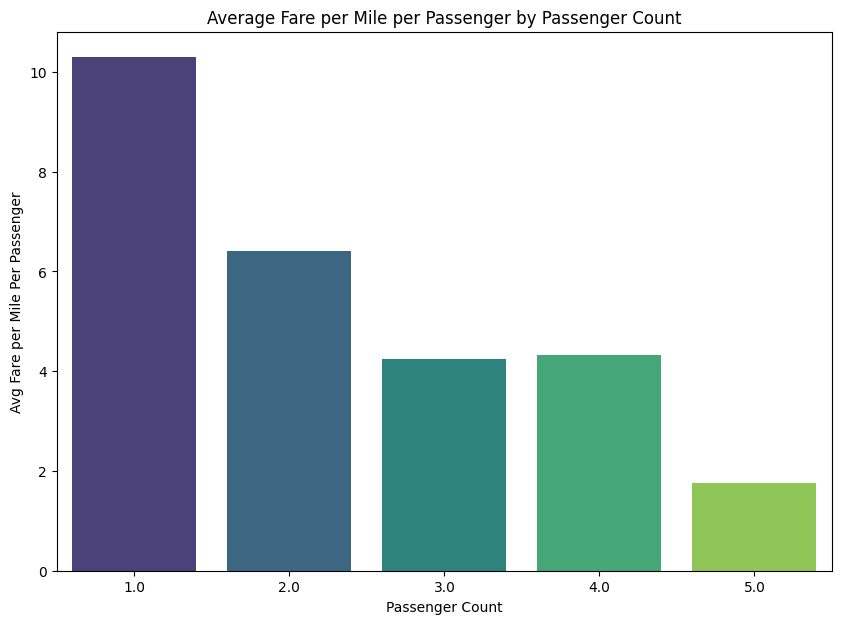

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,7))
sns.barplot(x='passenger_count', y='fare_per_mile_per_passenger', data=avg_fare, palette='viridis')
plt.xlabel('Passenger Count')
plt.ylabel('Avg Fare per Mile Per Passenger')
plt.title('Average Fare per Mile per Passenger by Passenger Count')
plt.show()

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [ ]:
# Compare the average fare per mile for different days and for different times of the day
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], errors='coerce')

df = df[df['trip_distance'] > 0].copy()
# Calculate fare per mile
df['fare_per_mile'] = df['fare_amount'] / df['trip_distance']

df['day_of_week'] = df['tpep_pickup_datetime'].dt.day_name()
df['hour'] = df['tpep_pickup_datetime'].dt.hour

In [ ]:
avg_fare_day = df.groupby('day_of_week')['fare_per_mile'].mean().reset_index()
# Order the days in natural order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
avg_fare_day['day_of_week'] = pd.Categorical(avg_fare_day['day_of_week'], categories=day_order, ordered=True)
avg_fare_day = avg_fare_day.sort_values('day_of_week')
# Group by hour and calculate the average fare per mile
avg_fare_hour = df.groupby('hour')['fare_per_mile'].mean().reset_index()

<ipython-input-107-0234c60b8deb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day_of_week', y='fare_per_mile', data=avg_fare_day, palette='viridis')


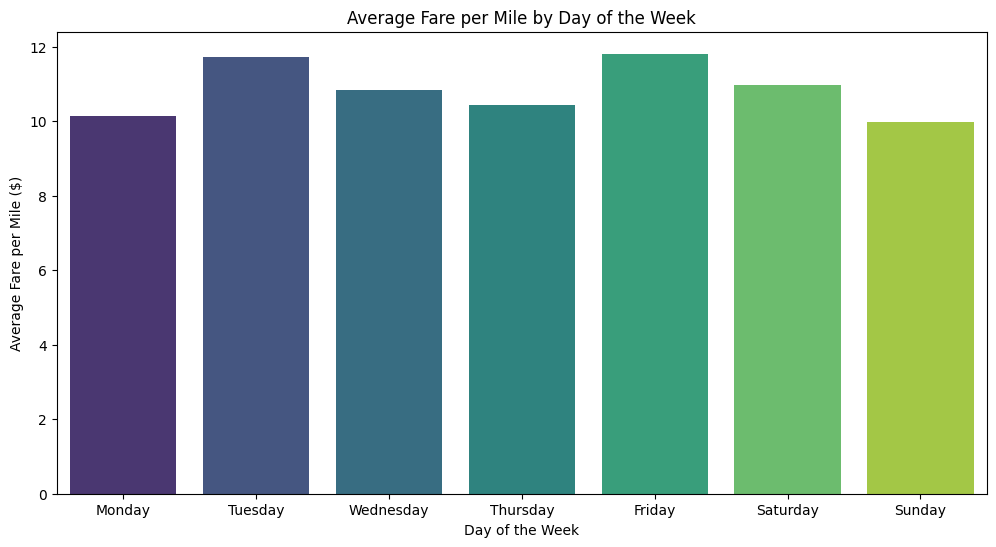

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='day_of_week', y='fare_per_mile', data=avg_fare_day, palette='viridis')
plt.xlabel("Day of the Week")
plt.ylabel("Average Fare per Mile ($)")
plt.title("Average Fare per Mile by Day of the Week")
plt.show()

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [ ]:
# Compare fare per mile for different vendors
filtered_dff = df[df['trip_distance'] > 0]
filtered_dff['fare_per_mile'] = filtered_dff['fare_amount'] / filtered_dff['trip_distance']

avg_fare_by_vendor = filtered_dff.groupby('VendorID')['fare_per_mile'].mean().reset_index()
print(avg_fare_by_vendor)

   VendorID  fare_per_mile
0         1       8.127918
1         2      11.857758


<ipython-input-81-f8c5a20aec2c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_dff['fare_per_mile'] = filtered_dff['fare_amount'] / filtered_dff['trip_distance']


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [ ]:
# Defining distance tiers
def distance_tier(dist):
  if dist <= 2:
    return 'Upto 2 Miles'
  elif dist <=5:
    return '2 to 5 Miles'
  else:
    return 'More then 5 Miles'
filtered_dff['distance_tier']=filtered_dff['trip_distance'].apply(distance_tier)


<ipython-input-82-af5b3a2d50f6>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_dff['distance_tier']=filtered_dff['trip_distance'].apply(distance_tier)


In [ ]:
avg_fare_by_vendor_tier = filtered_dff.groupby(['VendorID', 'distance_tier'])['fare_per_mile'].mean().reset_index()
print(avg_fare_by_vendor_tier)

   VendorID      distance_tier  fare_per_mile
0         1       2 to 5 Miles       6.395226
1         1  More then 5 Miles       4.412239
2         1       Upto 2 Miles       9.940247
3         2       2 to 5 Miles       6.548978
4         2  More then 5 Miles       4.507594
5         2       Upto 2 Miles      17.001767


In [ ]:
pivot_table = avg_fare_by_vendor_tier.pivot(index='distance_tier', columns='VendorID', values='fare_per_mile')
print(pivot_table)

VendorID                  1          2
distance_tier                         
2 to 5 Miles       6.395226   6.548978
More then 5 Miles  4.412239   4.507594
Upto 2 Miles       9.940247  17.001767


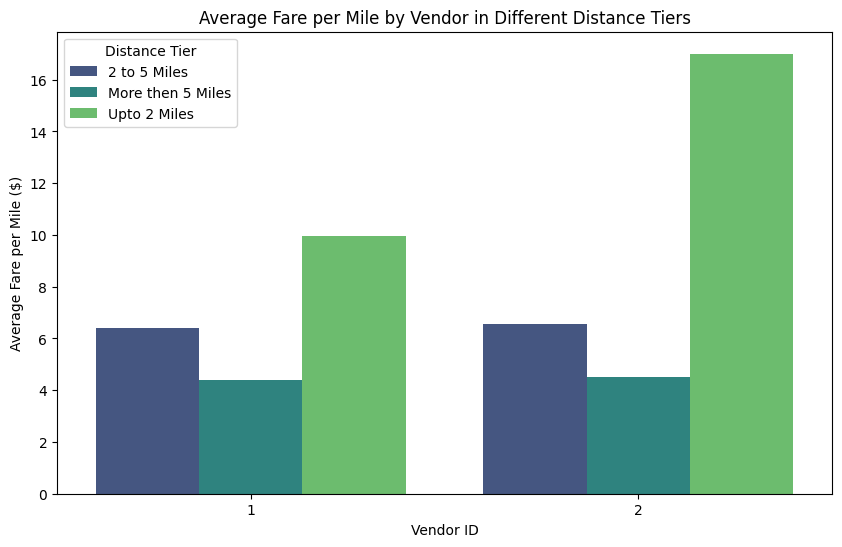

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='VendorID', y='fare_per_mile', hue='distance_tier', data=avg_fare_by_vendor_tier, palette='viridis')
plt.xlabel("Vendor ID")
plt.ylabel("Average Fare per Mile ($)")
plt.title("Average Fare per Mile by Vendor in Different Distance Tiers")
plt.legend(title='Distance Tier')
plt.show()

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [ ]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
tip_filtered = df[(df['fare_amount'] > 0) & (df['trip_distance'] > 0)].copy()
tip_filtered['tip_percentage'] = (tip_filtered['tip_amount'] / tip_filtered['fare_amount']) * 100
df_clean = tip_filtered[(tip_filtered['tip_percentage'] >= 0) & (tip_filtered['tip_percentage'] <= 100)]


In [ ]:
def distance_bin(distance):
  if distance <= 2:
    return '0-2 Miles'
  elif distance <=5:
    return '2-5 Miles'
  else:
    return 'Over 5 Miles'
df_clean['distance_bin'] = df_clean['trip_distance'].apply(distance_bin)

<ipython-input-87-09c3ec0ef033>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['distance_bin'] = df_clean['trip_distance'].apply(distance_bin)


<ipython-input-88-606e956f83d1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='distance_bin', y='tip_percentage', data=df_clean, palette='viridis')


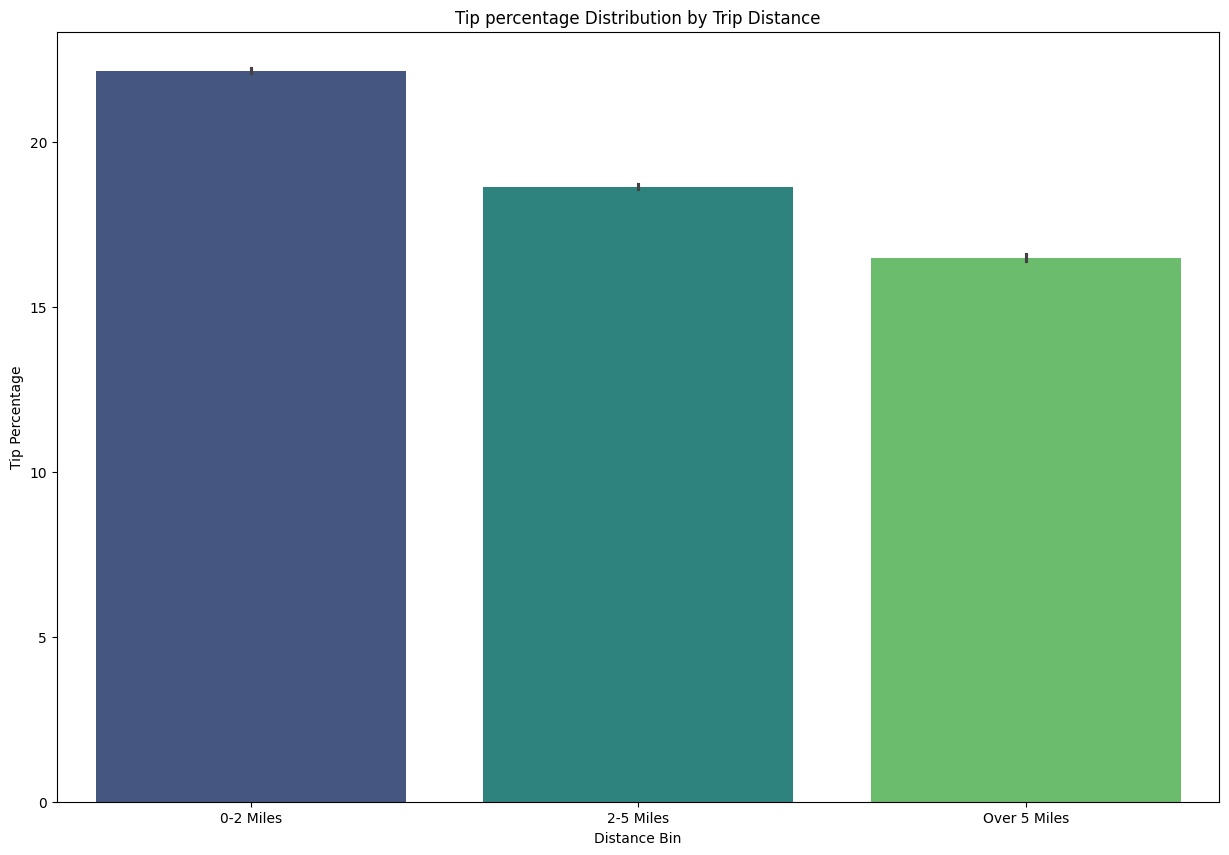

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(x='distance_bin', y='tip_percentage', data=df_clean, palette='viridis')
plt.xlabel('Distance Bin')
plt.ylabel('Tip Percentage')
plt.title('Tip percentage Distribution by Trip Distance')
plt.show()

<ipython-input-89-ca9249508cb2>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='passenger_count', y='tip_percentage', data=df_clean, palette='Set2')


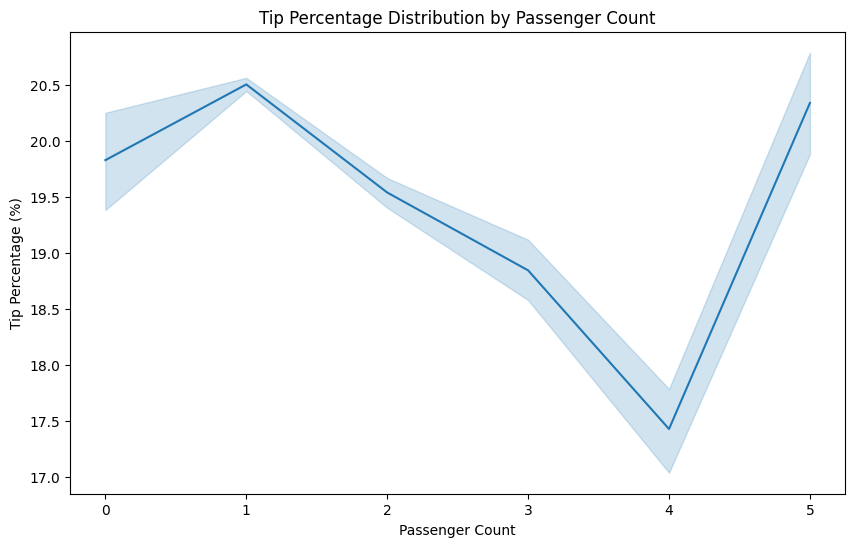

In [ ]:
# tip percentage distribution by passenger count
plt.figure(figsize=(10, 6))
sns.lineplot(x='passenger_count', y='tip_percentage', data=df_clean, palette='Set2')
plt.xlabel("Passenger Count")
plt.ylabel("Tip Percentage (%)")
plt.title("Tip Percentage Distribution by Passenger Count")
plt.show()


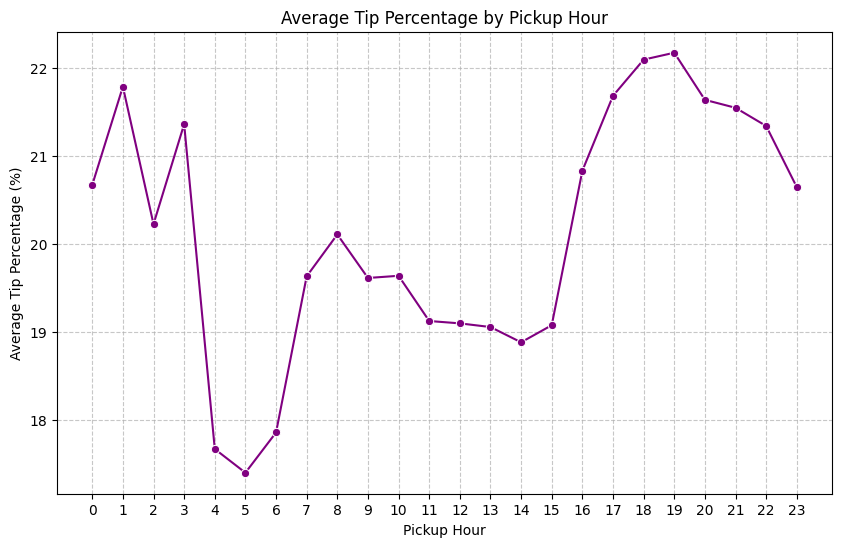

In [ ]:
# tip percentage by pickup hour
avg_tip_by_hour = tip_filtered.groupby('hour')['tip_percentage'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='hour', y='tip_percentage', data=avg_tip_by_hour, marker='o', color='purple')
plt.xlabel("Pickup Hour")
plt.ylabel("Average Tip Percentage (%)")
plt.title("Average Tip Percentage by Pickup Hour")
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [ ]:
low_tip_trip= df_clean[df_clean['tip_percentage'] < 10]
high_tip_trip= df_clean[df_clean['tip_percentage'] > 25]

In [ ]:
print('Low Tip Trips (<10%):')
print(low_tip_trip[['trip_distance','fare_amount','tip_amount','passenger_count']].describe())

print('\n High Tip Trips (>25%):')
print(high_tip_trip[['trip_distance','fare_amount','tip_amount','passenger_count']].describe())

Low Tip Trips (<10%):
       trip_distance   fare_amount    tip_amount  passenger_count
count   65417.000000  65417.000000  65417.000000     65417.000000
mean        3.953560     21.718068      0.266859         1.374383
std         5.287713     21.408911      0.845024         0.826002
min         0.010000      0.010000      0.000000         0.000000
25%         1.090000      9.300000      0.000000         1.000000
50%         1.900000     14.200000      0.000000         1.000000
75%         4.100000     24.700000      0.000000         2.000000
max       241.000000    850.000000     25.000000         5.000000

 High Tip Trips (>25%):
       trip_distance    fare_amount     tip_amount  passenger_count
count  112305.000000  112305.000000  112305.000000    112305.000000
mean        2.314861      14.459563       4.401287         1.306024
std         2.922944      11.762325       3.470972         0.758239
min         0.010000       1.070000       0.900000         0.000000
25%         0.93000

<ipython-input-93-051e0c1072dc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_tip_trip['tip_category'] ='Low Tip'
<ipython-input-93-051e0c1072dc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_tip_trip['tip_category']='High Tip'
<ipython-input-93-051e0c1072dc>:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='tip_category', y='trip_distance', data=combined, palette='coolwarm')


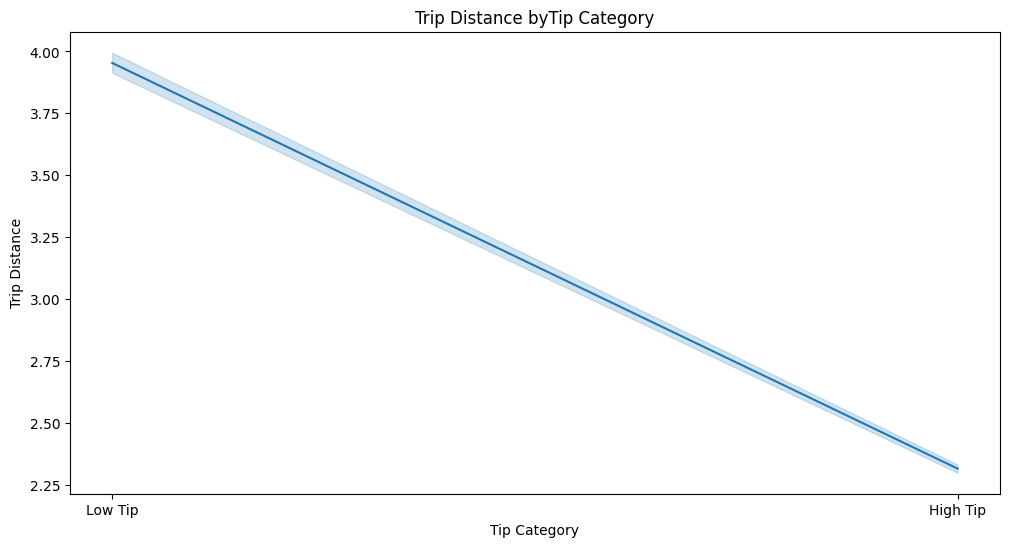

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
low_tip_trip['tip_category'] ='Low Tip'
high_tip_trip['tip_category']='High Tip'
combined = pd.concat([low_tip_trip, high_tip_trip])

plt.figure(figsize=(12,6))
sns.lineplot(x='tip_category', y='trip_distance', data=combined, palette='coolwarm')
plt.xlabel('Tip Category')
plt.ylabel('Trip Distance')
plt.title('Trip Distance byTip Category')
plt.show()

<ipython-input-94-215422ee5913>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_tip_trip['trip_duration'] = (low_tip_trip['tpep_dropoff_datetime'] - low_tip_trip['tpep_pickup_datetime']).dt.total_seconds() / 60
<ipython-input-94-215422ee5913>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_tip_trip['trip_duration'] = (high_tip_trip['tpep_dropoff_datetime'] - high_tip_trip['tpep_pickup_datetime']).dt.total_seconds() / 60
<ipython-input-94-215422ee5913>:5: FutureWarning: 

Passing `palette` without

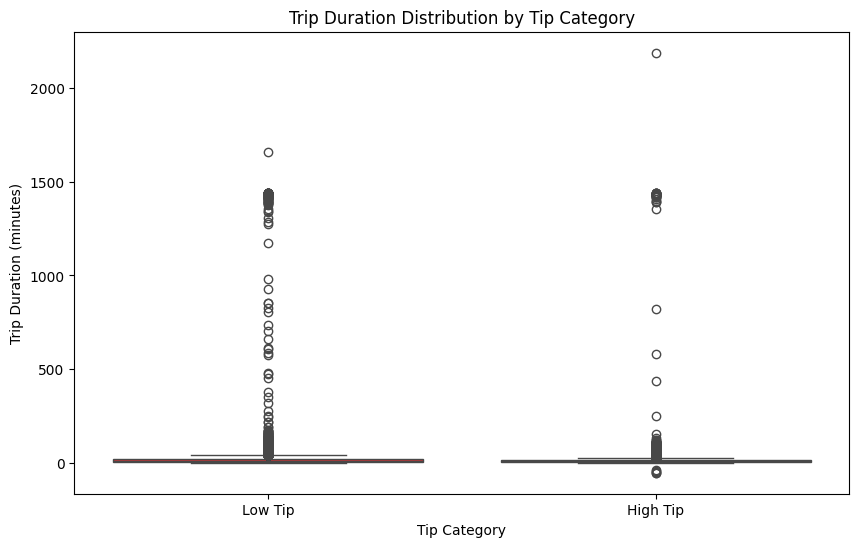

In [ ]:
low_tip_trip['trip_duration'] = (low_tip_trip['tpep_dropoff_datetime'] - low_tip_trip['tpep_pickup_datetime']).dt.total_seconds() / 60
high_tip_trip['trip_duration'] = (high_tip_trip['tpep_dropoff_datetime'] - high_tip_trip['tpep_pickup_datetime']).dt.total_seconds() / 60
combine=pd.concat([low_tip_trip, high_tip_trip])
plt.figure(figsize=(10,6))
sns.boxplot(x='tip_category', y='trip_duration', data=combined, palette='Set1')
plt.xlabel("Tip Category")
plt.ylabel("Trip Duration (minutes)")
plt.title("Trip Duration Distribution by Tip Category")
plt.show()


**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

In [ ]:
# See how passenger count varies across hours and days
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], errors='coerce')

df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['day_of_week'] = df['tpep_pickup_datetime'].dt.dayofweek
day_mapping = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df['day_name'] = df['day_of_week'].map(day_mapping)

passenger_variation = df.groupby(['day_name', 'pickup_hour'])['passenger_count'].mean().reset_index()

passenger_matrix = passenger_variation.pivot(index='day_name', columns='pickup_hour', values='passenger_count')

ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
passenger_matrix = passenger_matrix.reindex(ordered_days)

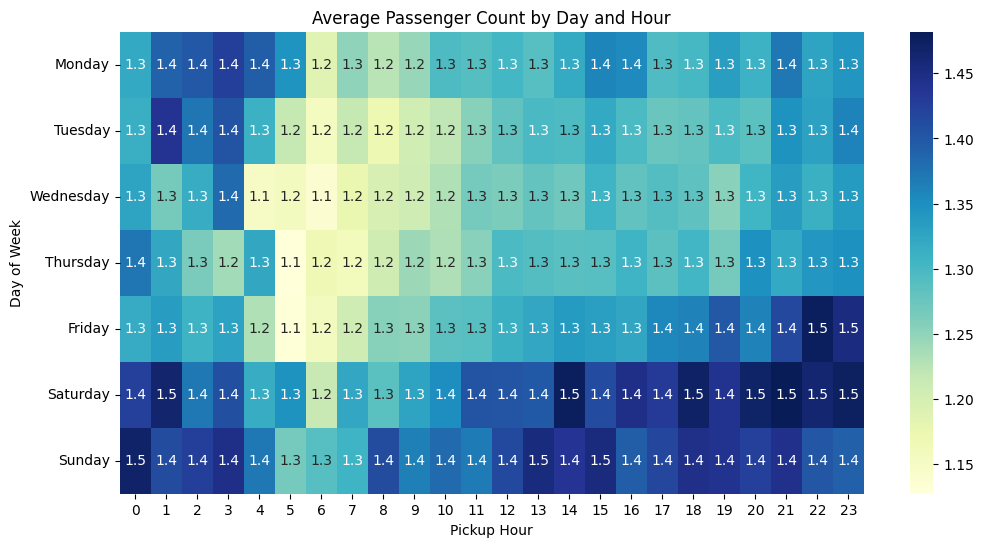

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.heatmap(passenger_matrix, annot=True, cmap='YlGnBu', fmt=".1f")
plt.title("Average Passenger Count by Day and Hour")
plt.xlabel("Pickup Hour")
plt.ylabel("Day of Week")
plt.show()

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

<ipython-input-97-bba2241f2048>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='zone',y='avg_passenger_count',data=passenger_by_zone,palette='viridis')


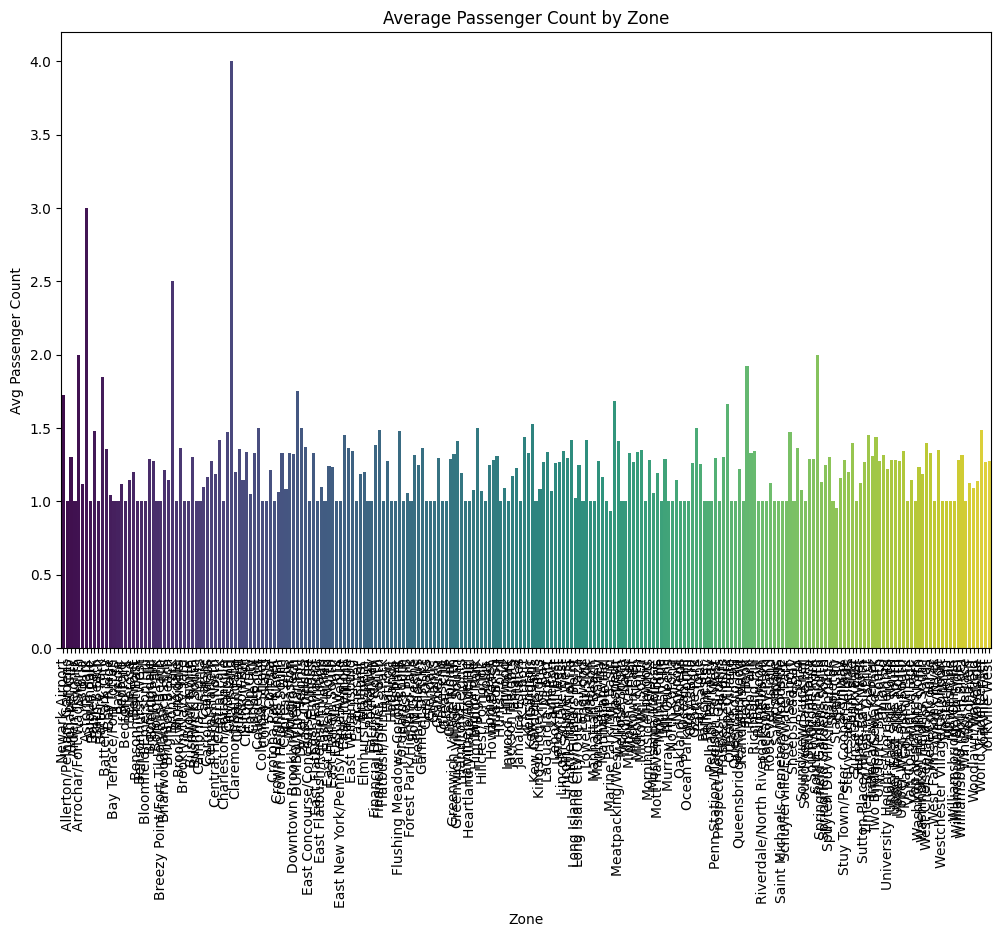

In [ ]:
# How does passenger count vary across zones
passenger_by_zone = df.groupby('PULocationID')['passenger_count'].mean().reset_index()
passenger_by_zone = passenger_by_zone.rename(columns={'passenger_count': 'avg_passenger_count'})

passenger_by_zone = passenger_by_zone.merge(df_zones[['LocationID', 'zone']],left_on='PULocationID',right_on='LocationID',how='left')

plt.figure(figsize=(12, 8))
sns.barplot(x='zone',y='avg_passenger_count',data=passenger_by_zone,palette='viridis')
plt.xlabel('Zone')
plt.ylabel('Avg Passenger Count')
plt.title('Average Passenger Count by Zone')
plt.xticks(rotation=90)
plt.show()


In [ ]:
# top 50 passenger count by zone
passenger_by_zone_top50 = passenger_by_zone.sort_values(by='avg_passenger_count', ascending=False).head(50)


<ipython-input-99-1b0dcd6d8e77>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='zone',y='avg_passenger_count',data=passenger_by_zone_top50,palette='viridis')


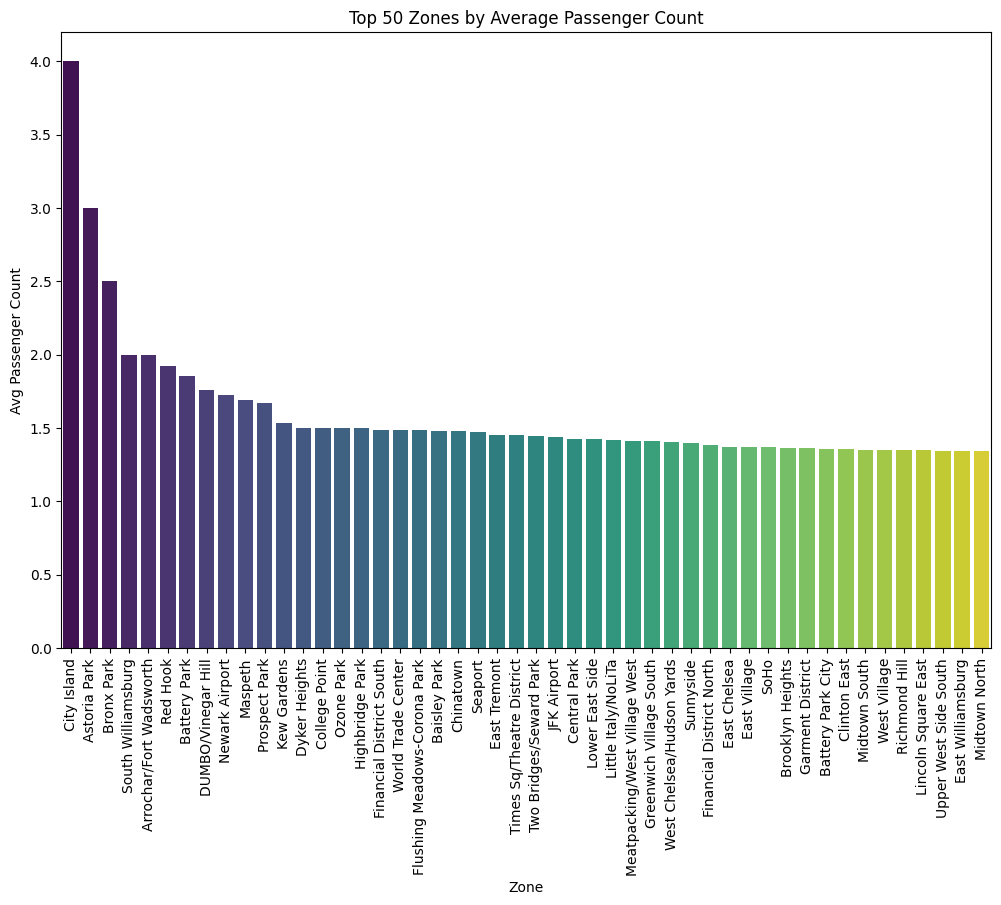

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x='zone',y='avg_passenger_count',data=passenger_by_zone_top50,palette='viridis')
plt.xlabel('Zone')
plt.ylabel('Avg Passenger Count')
plt.title('Top 50 Zones by Average Passenger Count')
plt.xticks(rotation=90)
plt.show()

In [ ]:
zones_with_trips = df_zones.merge(trip_counts, on='LocationID', how='left')
zones_with_trips = zones_with_trips.merge(drop_trip_counts, on='LocationID', how='left')
zones_with_trips.fillna(0, inplace=True)

In [ ]:
zones_with_trips = zones_with_trips.merge(passenger_by_zone[['zone','avg_passenger_count']], on='zone', how='left')
print(zones_with_trips.head())

   OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   

   pickup_trips_x  dropoff_trips_x  pickup_trips_y  dropoff_trips_y  \
0            29.0            787.0           

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [ ]:
# How often is each surcharge applied?
surcharge_cols = ['mta_tax', 'improvement_surcharge', 'congestion_surcharge', 'Airport_Fee', 'tolls_amount']

for col in surcharge_cols:
    pct = (df[col] > 0).mean() * 100  # Proportion of trips with this surcharge, in percent
    print(f"{col}: applied in {pct:.2f}% of trips")



mta_tax: applied in 99.06% of trips
improvement_surcharge: applied in 99.97% of trips
congestion_surcharge: applied in 92.31% of trips
Airport_Fee: applied in 8.94% of trips
tolls_amount: applied in 8.31% of trips


## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.